In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import os

# List available files in the directory

In [2]:
for root, dirs, files in os.walk('/kaggle/input'):
    for file in files:
        print(os.path.join(root, file))

/kaggle/input/time-series-forecasting-with-yahoo-stock-price/yahoo_stock.csv


# Read the stock data from CSV and set the 'Date' column as the index

In [3]:
stock_data = pd.read_csv('/kaggle/input/time-series-forecasting-with-yahoo-stock-price/yahoo_stock.csv', parse_dates=['Date'], index_col='Date')

# Display the first few rows of the dataset

In [4]:
print(stock_data.head())

                   High          Low         Open        Close        Volume  \
Date                                                                           
2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088  3.587980e+09   
2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893  3.884930e+09   
2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117  2.852940e+09   
2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117  2.852940e+09   
2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107  1.466840e+09   

              Adj Close  
Date                     
2015-11-23  2086.590088  
2015-11-24  2089.139893  
2015-11-25  2088.870117  
2015-11-26  2088.870117  
2015-11-27  2090.110107  


# Display the minimum and maximum dates in the dataset

In [5]:
print("Minimum Date:", stock_data.index.min())
print("Maximum Date:", stock_data.index.max())

Minimum Date: 2015-11-23 00:00:00
Maximum Date: 2020-11-20 00:00:00


# Plot the 'High' and 'Low' columns

<Axes: xlabel='Date'>

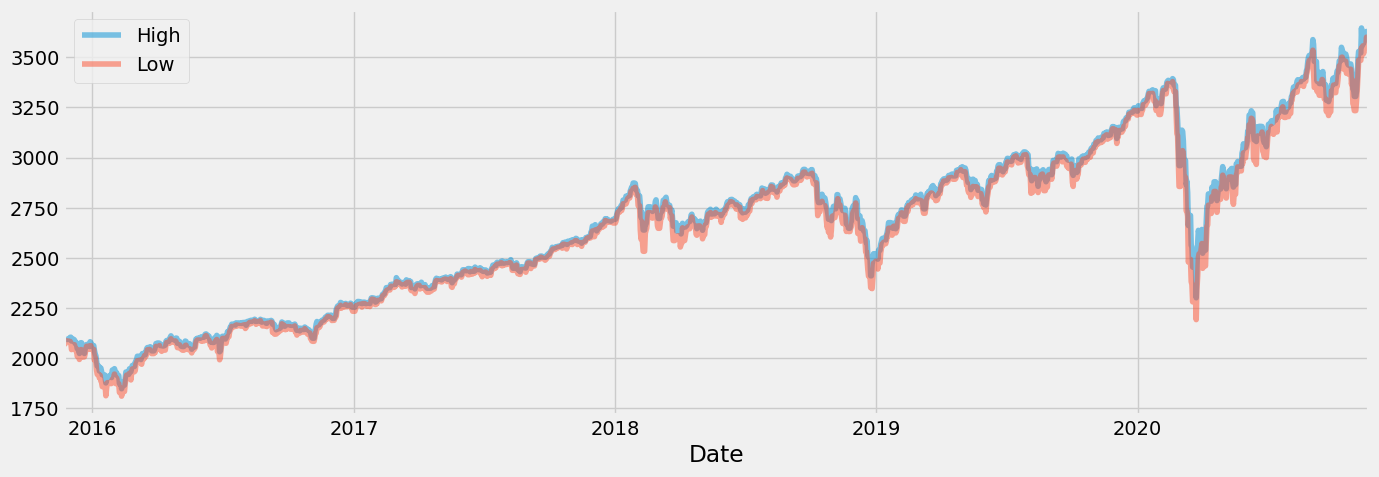

In [6]:
stock_data[['High', 'Low']].plot(figsize=(15, 5), alpha=0.5)

# Plot the 'Open' and 'Close' columns

<Axes: xlabel='Date'>

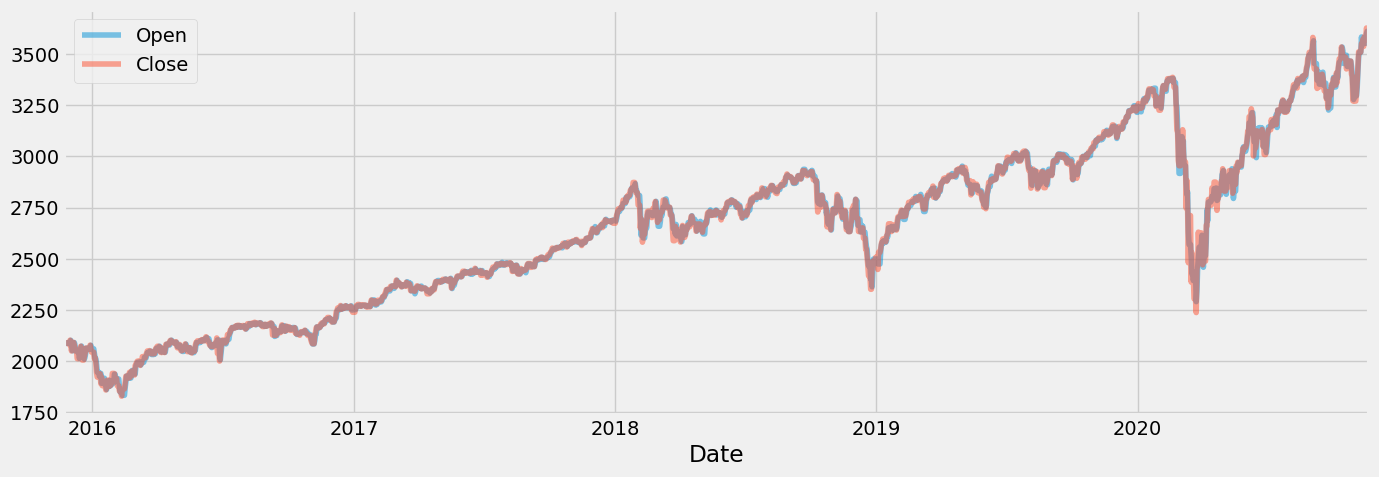

In [7]:
stock_data[['Open', 'Close']].plot(figsize=(15, 5), alpha=0.5)

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
def decompose_and_plot(df, column_name):
    """
    Decompose a time series and plot the trend, seasonality, and residuals for the given column.
    df: DataFrame
    column_name: Name of the column to decompose
    """
    result_multiplicative = seasonal_decompose(df[column_name], model='multiplicative', extrapolate_trend='freq')
    result_additive = seasonal_decompose(df[column_name], model='additive', extrapolate_trend='freq')

    plt.rcParams.update({'figure.figsize': (20, 10)})
    result_multiplicative.plot().suptitle('Multiplicative Decomposition', fontsize=30)
    result_additive.plot().suptitle('Additive Decomposition', fontsize=30)
    plt.show()

    return result_multiplicative, result_additive

# Decompose and plot 'Open' column

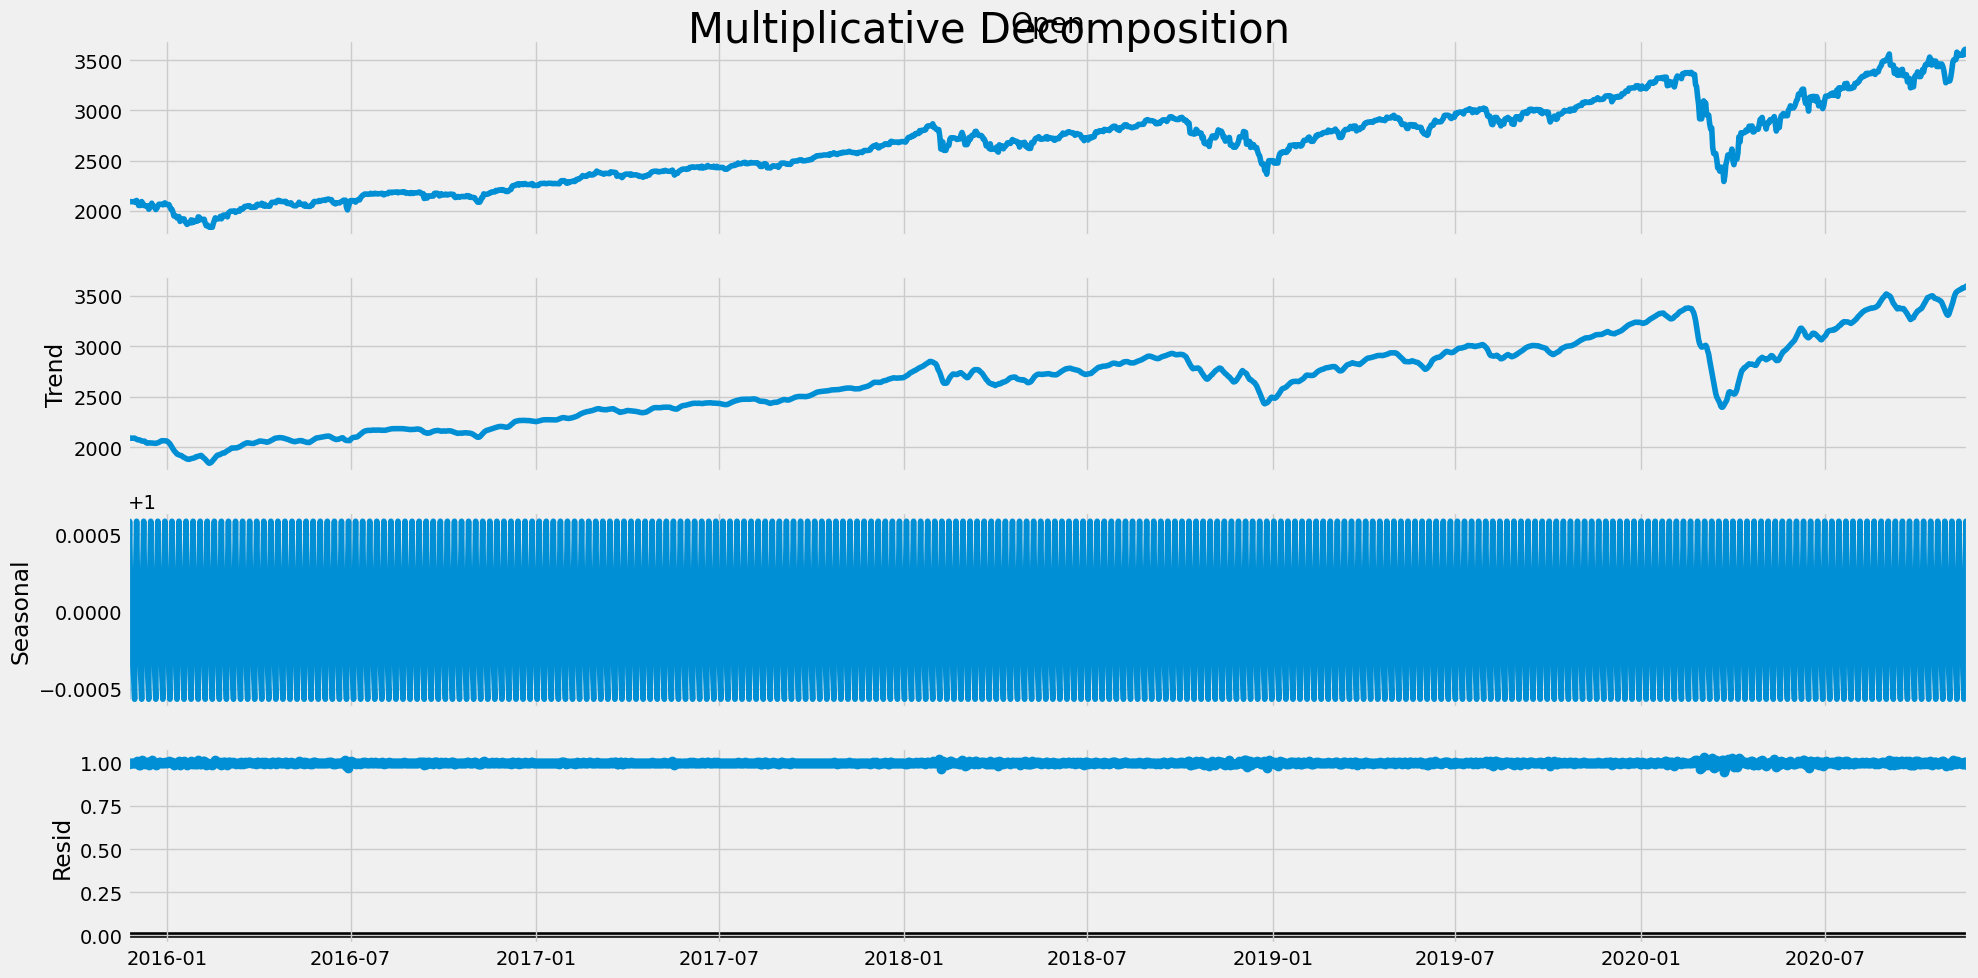

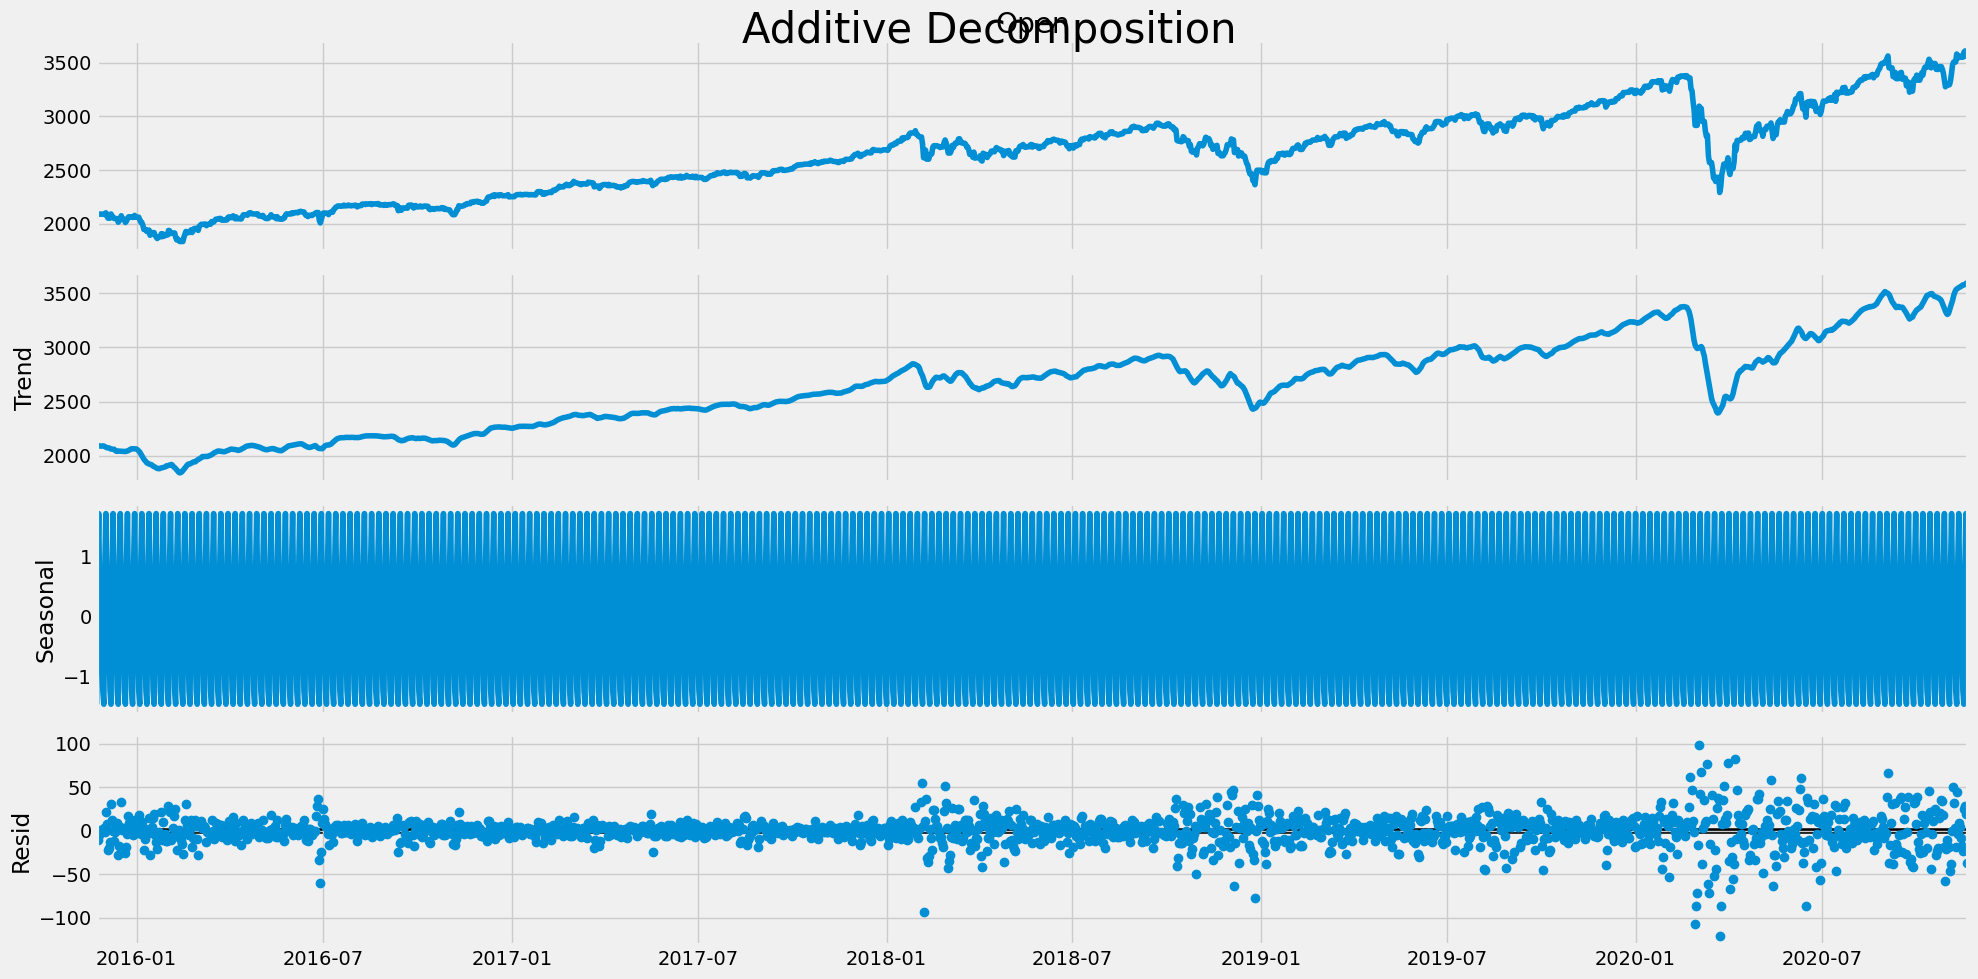

In [10]:
result_mul_open, result_add_open = decompose_and_plot(stock_data, 'Open')

# Concatenate and rename the decomposed components for 'Open' column

In [11]:
df_open_decomposed = pd.concat([result_add_open.seasonal, result_add_open.trend, result_add_open.resid, result_add_open.observed], axis=1)
df_open_decomposed.columns = ['Seasonal', 'Trend', 'Residual', 'Actual Values']

# Decompose and plot 'Close' column

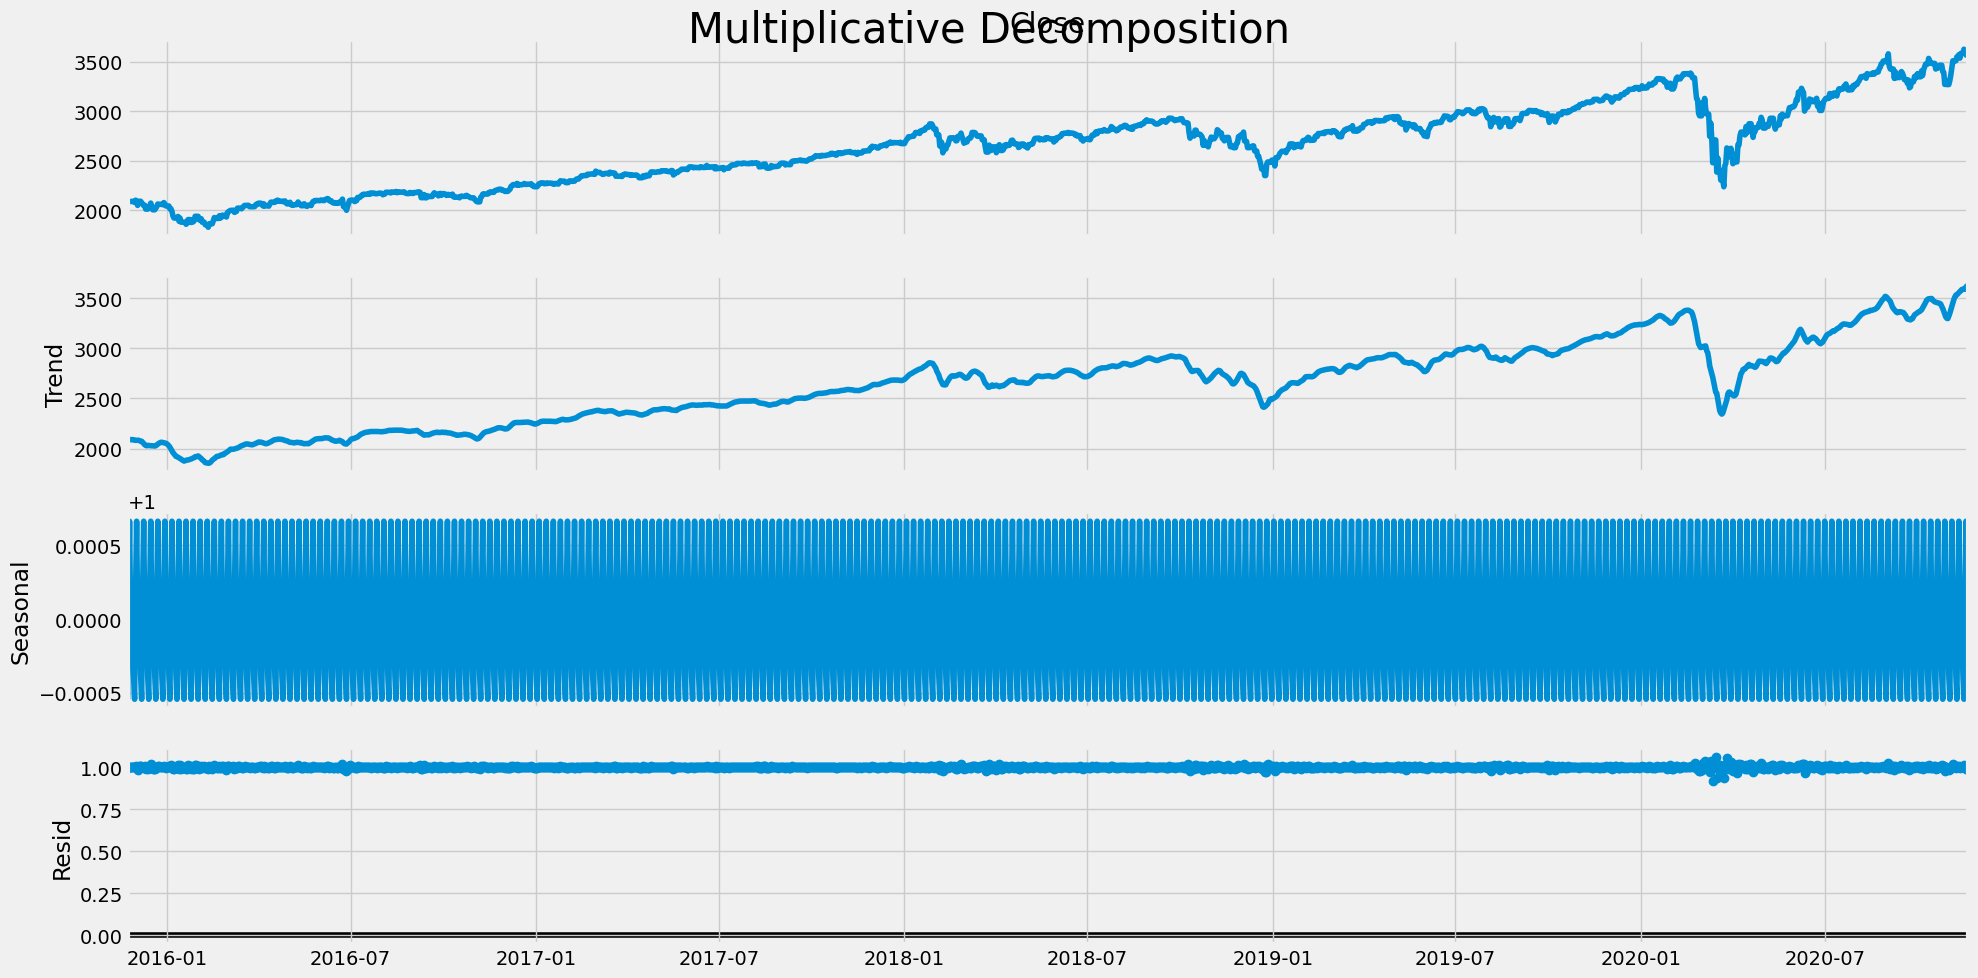

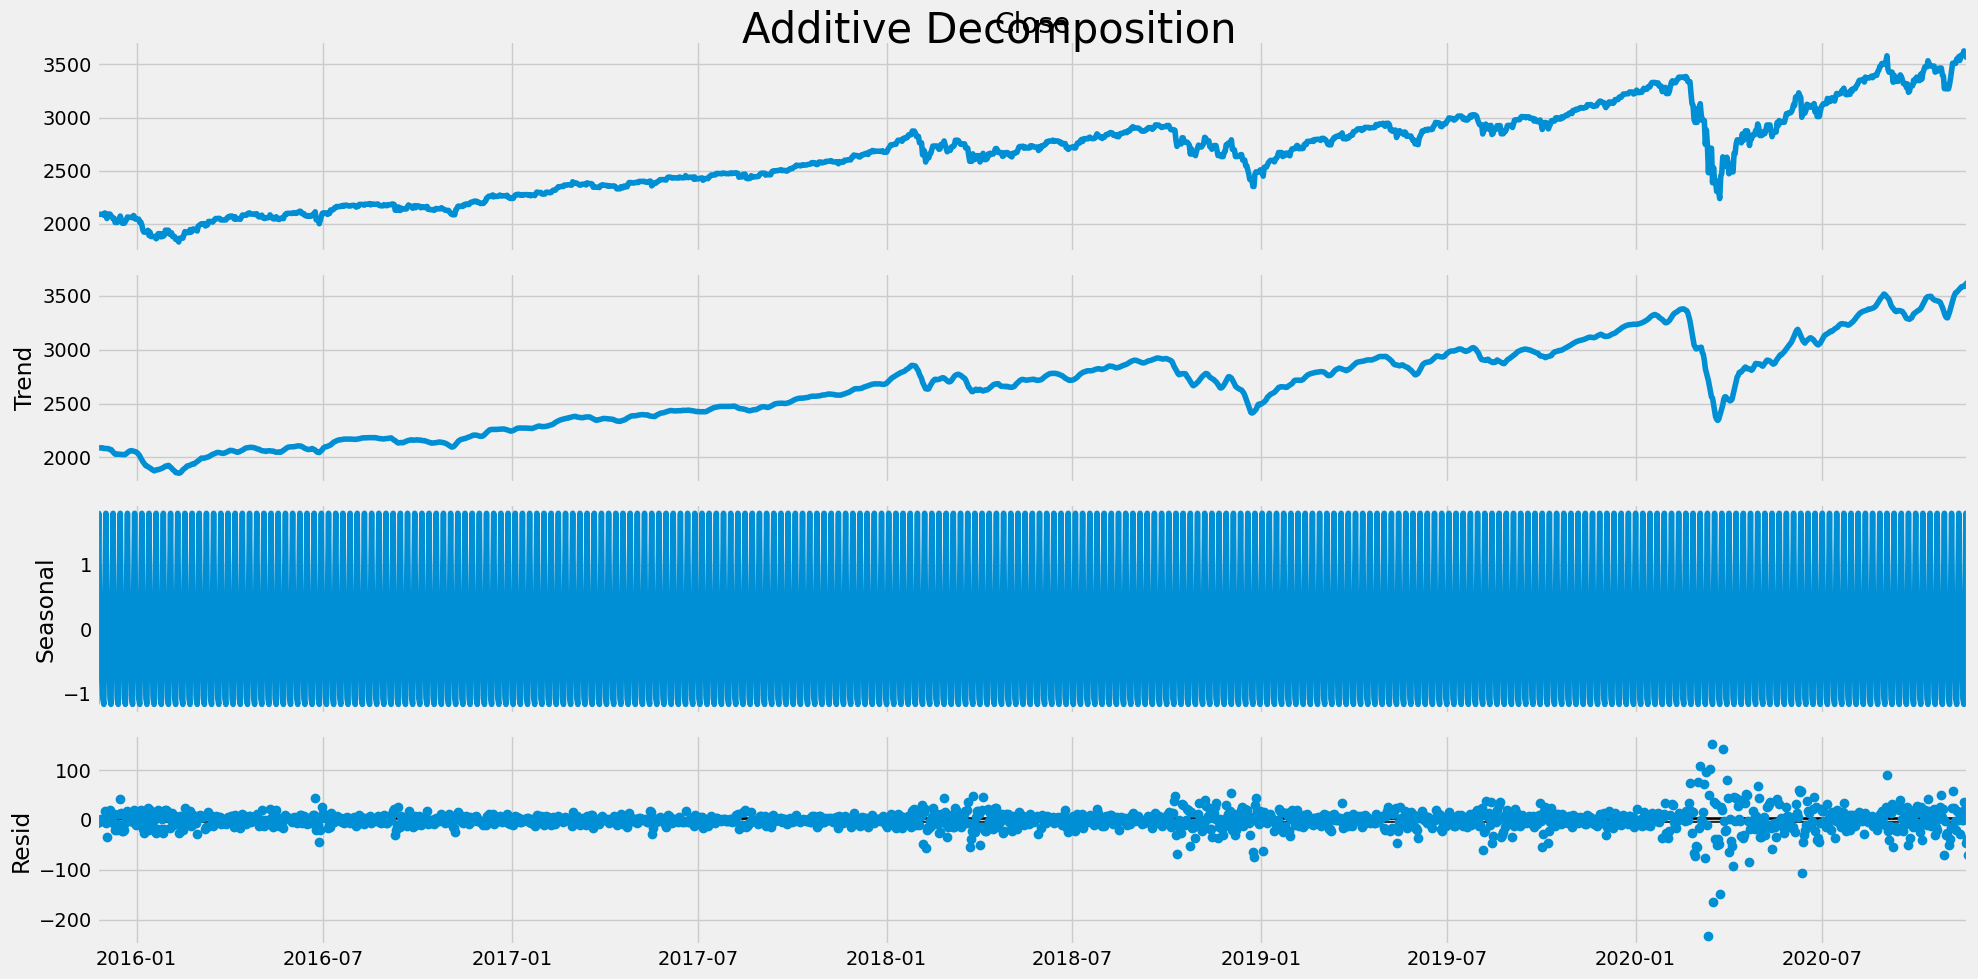

In [12]:
result_mul_close, result_add_close = decompose_and_plot(stock_data, 'Close')

# Concatenate and rename the decomposed components for 'Close' column

In [13]:
df_close_decomposed = pd.concat([result_add_close.seasonal, result_add_close.trend, result_add_close.resid, result_add_close.observed], axis=1)
df_close_decomposed.columns = ['Seasonal', 'Trend', 'Residual', 'Actual Values']

# Decompose and plot 'High' column

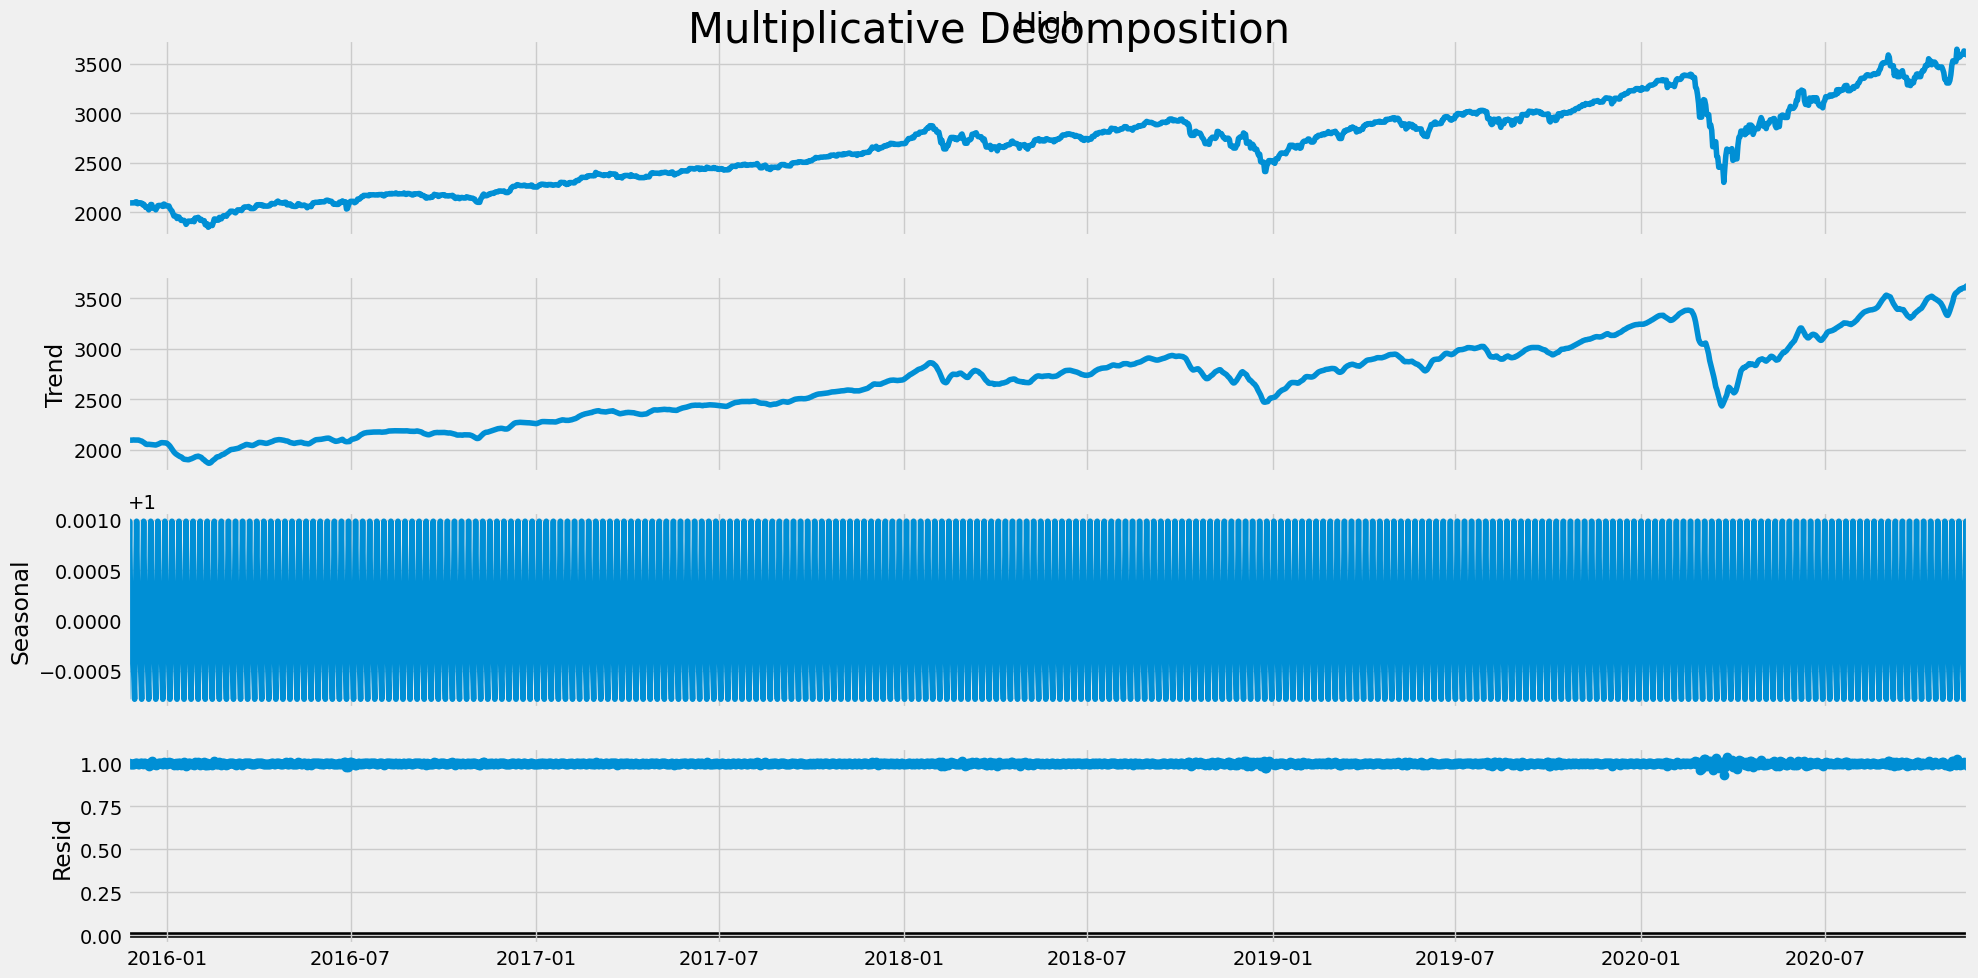

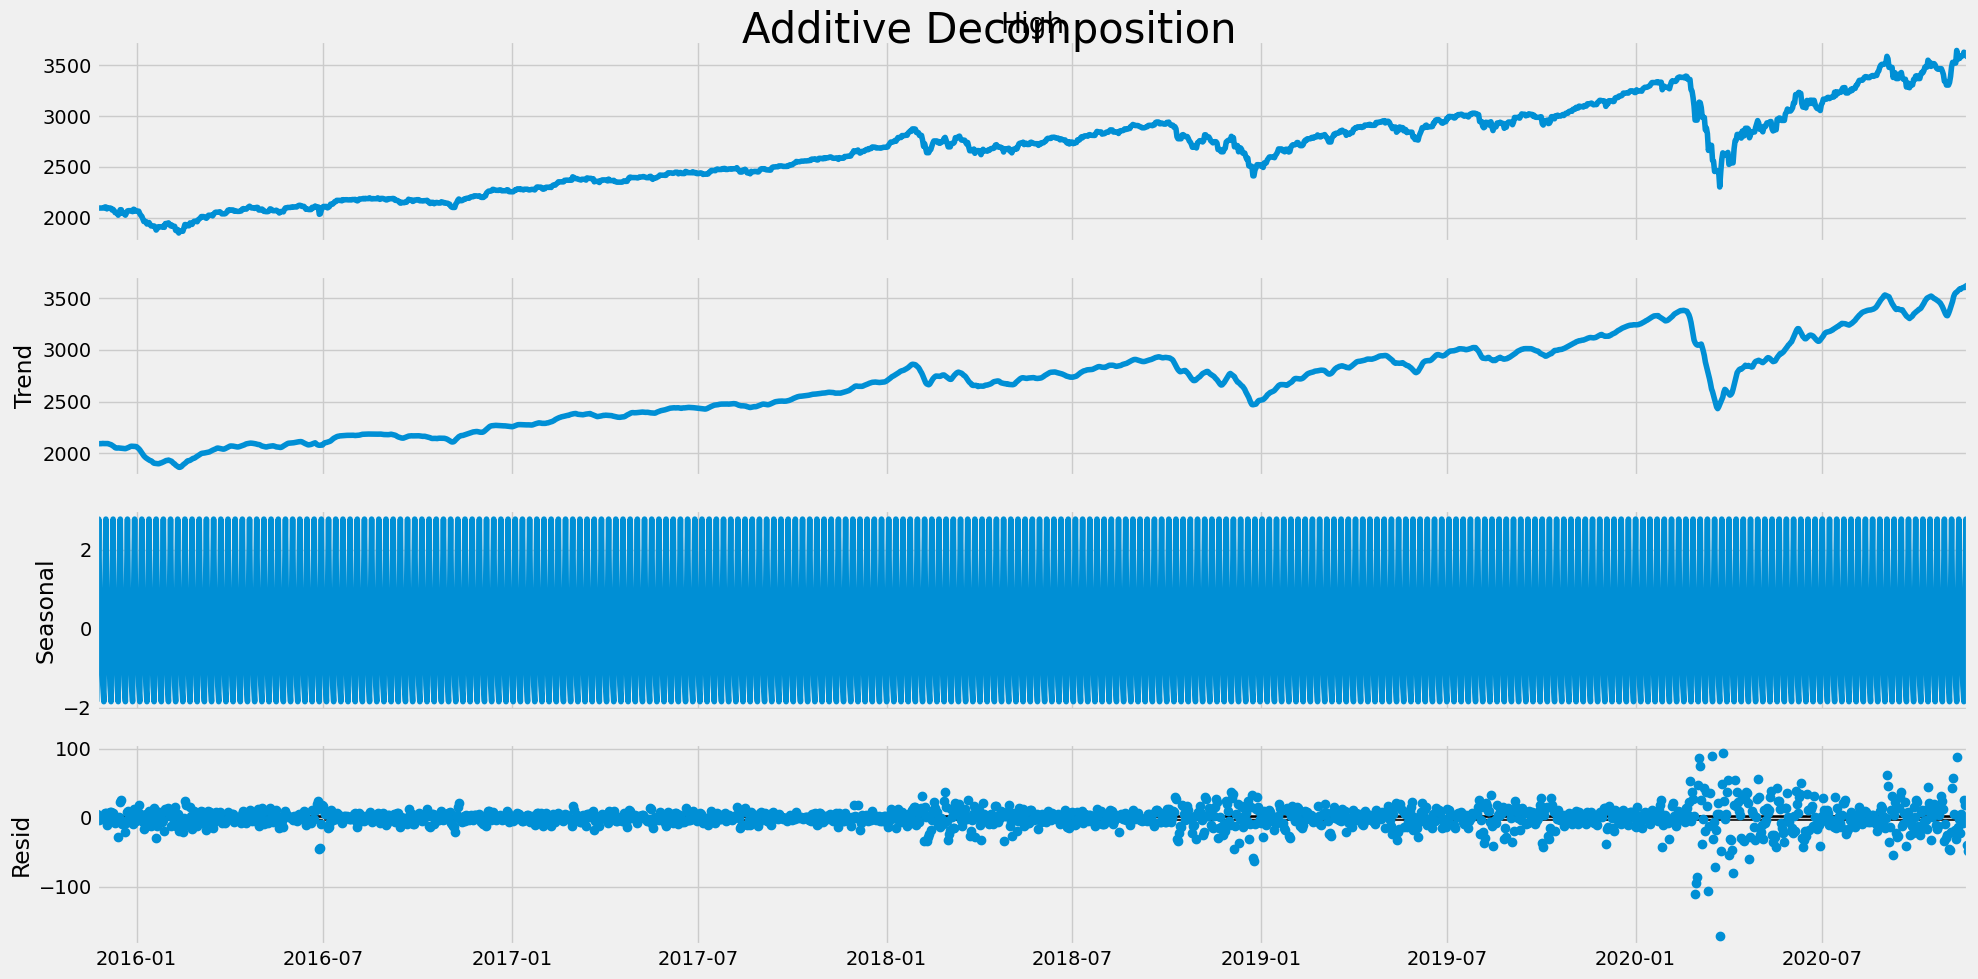

In [14]:
result_mul_high, result_add_high = decompose_and_plot(stock_data, 'High')

# Concatenate and rename the decomposed components for 'High' column

In [15]:
df_high_decomposed = pd.concat([result_add_high.seasonal, result_add_high.trend, result_add_high.resid, result_add_high.observed], axis=1)
df_high_decomposed.columns = ['Seasonal', 'Trend', 'Residual', 'Actual Values']

# Decompose and plot 'Low' column

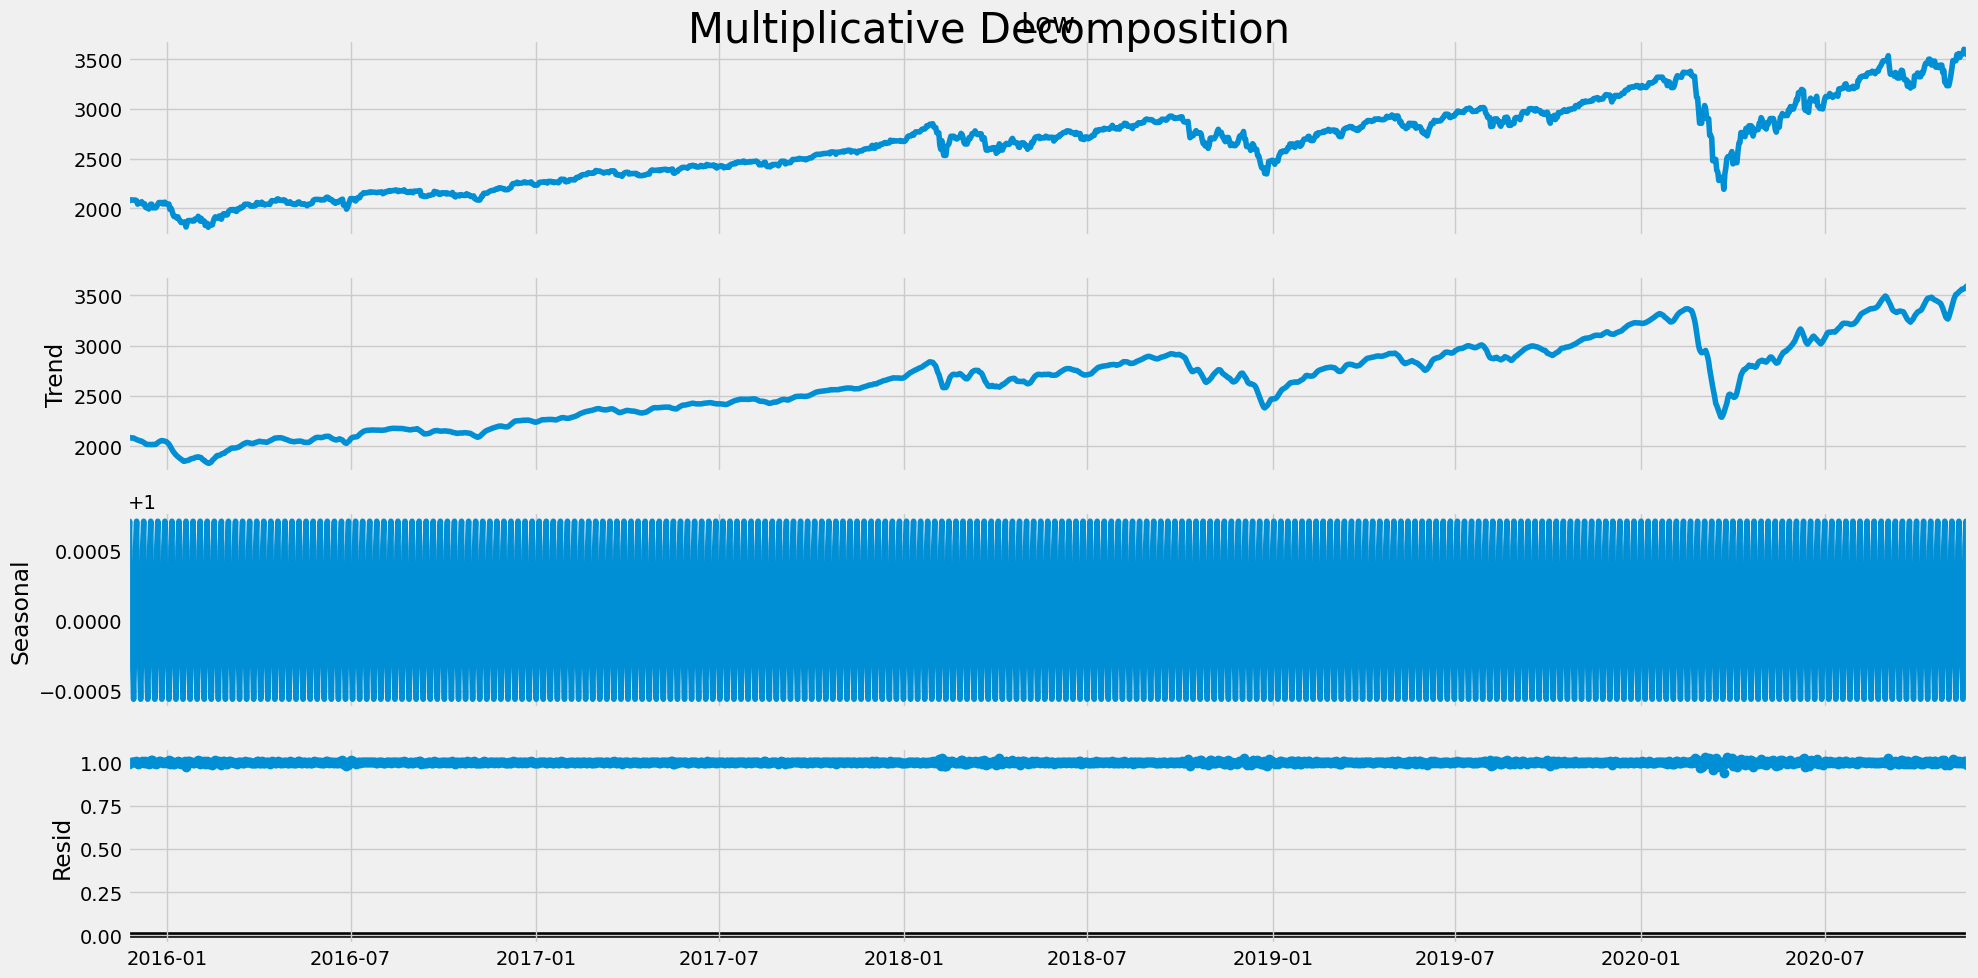

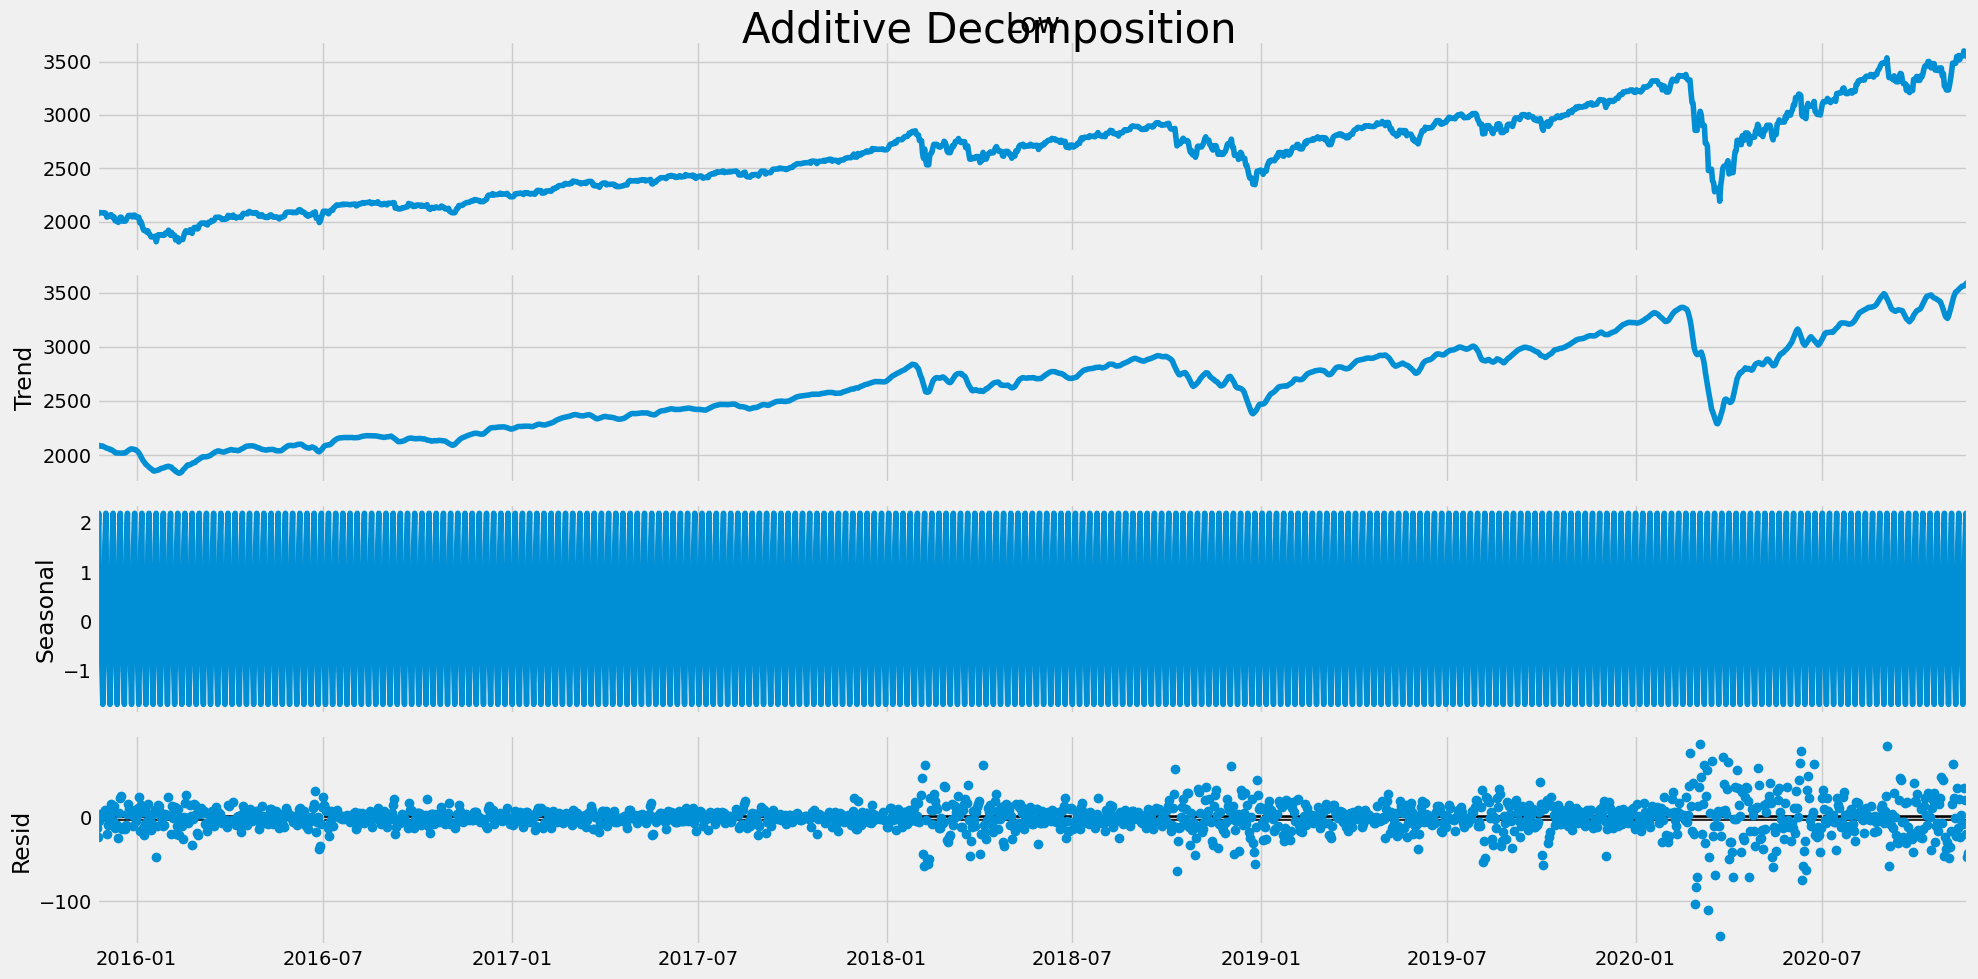

In [16]:
result_mul_low, result_add_low = decompose_and_plot(stock_data, 'Low')

# Concatenate and rename the decomposed components for 'Low' column

In [17]:
df_low_decomposed = pd.concat([result_add_low.seasonal, result_add_low.trend, result_add_low.resid, result_add_low.observed], axis=1)
df_low_decomposed.columns = ['Seasonal', 'Trend', 'Residual', 'Actual Values']